<a href="https://colab.research.google.com/github/saqibmanzar/Double-Pendullum-Chaotic-Path-prediction-using-LSTM/blob/main/Double_Pendullum_LSTM_chaotic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import
from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import pickle
from itertools import *

import csv

import matplotlib.animation as animation
import random
import matplotlib.patches as mpatches
from statsmodels.tsa.arima_model import ARMA
from sklearn.metrics import r2_score
import pandas as pd
import tensorflow as tf


from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
G = 9.8  # acceleration due to gravity, in m/s^2
L1 = 1.0  # length of pendulum 1 in m
L2 = 1.0  # length of pendulum 2 in m
M1 = 1.0  # mass of pendulum 1 in kg
M2 = 2.0  # mass of pendulum 2 in kg

# derivs(state,t) returns array of 4 number [Z1, Z1_dot, Z2, Z2_dot]
def derivs(state, t):
    
    dydx = np.zeros_like(state)
    dydx[0] = state[1]

    del_ = state[2] - state[0]
    den1 = (M1 + M2)*L1 - M2*L1*cos(del_)*cos(del_) #del1=L1*(M1+M2*sin(del)*sin(del))
    dydx[1] = (M2*L1*state[1]*state[1]*sin(del_)*cos(del_) +
               M2*G*sin(state[2])*cos(del_) +
               M2*L2*state[3]*state[3]*sin(del_) -
               (M1 + M2)*G*sin(state[0]))/den1

    dydx[2] = state[3]

    den2 = (L2/L1)*den1
    dydx[3] = (-M2*L2*state[3]*state[3]*sin(del_)*cos(del_) +
               (M1 + M2)*G*sin(state[0])*cos(del_) -
               (M1 + M2)*L1*state[1]*state[1]*sin(del_) -
               (M1 + M2)*G*sin(state[2]))/den2

    return dydx

def data():  
    dt = 0.01
    t = np.arange(0.0, 100 , dt)      
    len(t)
    arr=[]
    time=[]

    state = np.radians([170, 0.1, 150, 0.1]) #theta1, theta1dot, theta2, theta2dot
    y = integrate.odeint(derivs, state, t)   
    x1 = 1 * sin(y[:, 0])
    y1 = -1 * cos(y[:, 0])
    x2 = 1 * sin(y[:, 2]) + x1
    y2 = -1 * cos(y[:, 2]) + y1
    for i in range(len(x1)):
        all=[x1[i],y1[i],x2[i],y2[i]]
 
        tm = [t[i]]
        time.append(tm)
        arr.append(all)
    return time, arr

t = data()[0]
arr = data()[1]

print(len(arr))
traindataX = np.array(arr[:8000])
testdataX = np.array(arr[8000:])


10000


In [81]:
trainsetX1 = []
trainoutX1 = []
trainoutY1 = []
trainoutX2 = []
trainoutY2 = []
testsetX = []




In [82]:
n_future = 1
n_past = 200

In [83]:
testsetx1 = []
testsety1 = []
testsetx2 = []
testsety2 = []

In [84]:
for i in range(n_past, len(traindataX) - n_future +1):
    trainsetX1.append(traindataX[i - n_past:i, 0:traindataX.shape[1]])
    trainoutX1.append(traindataX[i + n_future - 1:i + n_future, 0])
    trainoutY1.append(traindataX[i + n_future - 1:i + n_future, 1])
    trainoutX2.append(traindataX[i + n_future - 1:i + n_future, 2])
    trainoutY2.append(traindataX[i + n_future - 1:i + n_future, 3]) 

In [85]:
trainX, trainX1, trainY1, trainX2, trainY2 = np.array(trainsetX1), np.array(trainoutX1), np.array(trainoutY1), np.array(trainoutX2), np.array(trainoutY2)

In [86]:
for i in range(n_past, len(testdataX) - n_future +1):
    testsetX.append(testdataX[i - n_past:i, 0:testdataX.shape[1]])
    testsetx1.append(testdataX[i + n_future - 1:i + n_future, 0])
    testsety1.append(testdataX[i + n_future - 1:i + n_future, 1]) 
    testsetx2.append(testdataX[i + n_future - 1:i + n_future, 2]) 
    testsety2.append(testdataX[i + n_future - 1:i + n_future, 3])  

In [87]:
testx1 = np.array(testsetx1)
testx2 = np.array(testsetx2)
testy1 = np.array(testsety1)
testy2 = np.array(testsety2)

In [90]:
len(testx1)

1800

In [89]:
testX[200:]

array([[[ 0.12549865, -0.99209379, -0.65888068, -0.37181235],
        [ 0.18017042, -0.98363541, -0.659968  , -0.44126338],
        [ 0.229606  , -0.97328366, -0.65838286, -0.51341871],
        ...,
        [-0.97368705, -0.22788928, -0.26452375, -0.93293354],
        [-0.95549056, -0.29502168, -0.2403933 , -0.99404665],
        [-0.93292709, -0.36006533, -0.2155933 , -1.056795  ]],

       [[ 0.18017042, -0.98363541, -0.659968  , -0.44126338],
        [ 0.229606  , -0.97328366, -0.65838286, -0.51341871],
        [ 0.27355254, -0.96185706, -0.65394624, -0.58803088],
        ...,
        [-0.95549056, -0.29502168, -0.2403933 , -0.99404665],
        [-0.93292709, -0.36006533, -0.2155933 , -1.056795  ],
        [-0.90616652, -0.42292108, -0.19022225, -1.12107851]],

       [[ 0.229606  , -0.97328366, -0.65838286, -0.51341871],
        [ 0.27355254, -0.96185706, -0.65394624, -0.58803088],
        [ 0.31188945, -0.9501184 , -0.64654853, -0.66481745],
        ...,
        [-0.93292709, -0.36

In [58]:
testX[200]

array([[ 1.25498653e-01, -9.92093790e-01, -6.58880680e-01,
        -3.71812352e-01],
       [ 1.80170424e-01, -9.83635409e-01, -6.59968003e-01,
        -4.41263376e-01],
       [ 2.29606005e-01, -9.73283660e-01, -6.58382863e-01,
        -5.13418712e-01],
       [ 2.73552538e-01, -9.61857063e-01, -6.53946242e-01,
        -5.88030883e-01],
       [ 3.11889452e-01, -9.50118398e-01, -6.46548532e-01,
        -6.64817450e-01],
       [ 3.44603881e-01, -9.38748190e-01, -6.36145991e-01,
        -7.43479943e-01],
       [ 3.71761729e-01, -9.28328184e-01, -6.22751768e-01,
        -8.23719844e-01],
       [ 3.93477411e-01, -9.19334285e-01, -6.06423404e-01,
        -9.05250219e-01],
       [ 4.09884609e-01, -9.12137384e-01, -5.87248682e-01,
        -9.87802437e-01],
       [ 4.21109328e-01, -9.07009886e-01, -5.65331362e-01,
        -1.07112803e+00],
       [ 4.27245518e-01, -9.04135647e-01, -5.40777744e-01,
        -1.15499609e+00],
       [ 4.28332496e-01, -9.03621200e-01, -5.13684453e-01,
      

In [61]:
len(testX)

1800

In [60]:
testX = np.array(testsetX)

In [30]:
len(testX)

1800

In [9]:
model = Sequential()
model.add(LSTM(64, activation=LeakyReLU(), input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation=LeakyReLU(), return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(trainX1.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 200, 64)           17664     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 30,113
Trainable params: 30,113
Non-trainable params: 0
_________________________________________________________________


In [10]:
model1 = Sequential()
model1.add(LSTM(64, activation=LeakyReLU(), input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model1.add(LSTM(32, activation=LeakyReLU(), return_sequences=False))
model1.add(Dropout(0.3))
model1.add(Dense(trainY1.shape[1]))

model1.compile(optimizer='adam', loss='mse')
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 200, 64)           17664     
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 30,113
Trainable params: 30,113
Non-trainable params: 0
_________________________________________________________________


In [11]:
model2 = Sequential()
model2.add(LSTM(64, activation=LeakyReLU(), input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model2.add(LSTM(32, activation=LeakyReLU(), return_sequences=False))
model2.add(Dropout(0.3))
model2.add(Dense(trainX2.shape[1]))

model2.compile(optimizer='adam', loss='mse')
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 200, 64)           17664     
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 30,113
Trainable params: 30,113
Non-trainable params: 0
_________________________________________________________________


In [12]:
model3 = Sequential()
model3.add(LSTM(64, activation=LeakyReLU(), input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model3.add(LSTM(32, activation=LeakyReLU(), return_sequences=False))
model3.add(Dropout(0.3))
model3.add(Dense(trainY2.shape[1]))

model3.compile(optimizer='adam', loss='mse')
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 200, 64)           17664     
_________________________________________________________________
lstm_7 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 30,113
Trainable params: 30,113
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(trainX, trainX1, epochs=6, validation_split=0.1, verbose=1)

Epoch 1/6
220/220 [==============================] - 35s 161ms/step - loss: 0.0689 - val_loss: 0.0044
Epoch 2/6
220/220 [==============================] - 36s 162ms/step - loss: 0.0186 - val_loss: 0.0031
Epoch 3/6
220/220 [==============================] - 36s 164ms/step - loss: 0.0144 - val_loss: 0.0023
Epoch 4/6
220/220 [==============================] - 36s 161ms/step - loss: 0.0126 - val_loss: 0.0016
Epoch 5/6
220/220 [==============================] - 36s 162ms/step - loss: 0.0119 - val_loss: 0.0041
Epoch 6/6
220/220 [==============================] - 36s 162ms/step - loss: 0.0112 - val_loss: 0.0023


In [14]:
history1 = model1.fit(trainX, trainY1, epochs=6, validation_split=0.1, verbose=1)

Epoch 1/6
220/220 [==============================] - 36s 164ms/step - loss: 0.0598 - val_loss: 0.0040
Epoch 2/6
220/220 [==============================] - 36s 162ms/step - loss: 0.0160 - val_loss: 0.0043
Epoch 3/6
220/220 [==============================] - 36s 163ms/step - loss: 0.0126 - val_loss: 0.0025
Epoch 4/6
220/220 [==============================] - 36s 162ms/step - loss: 0.0106 - val_loss: 0.0026
Epoch 5/6
220/220 [==============================] - 36s 164ms/step - loss: 0.0098 - val_loss: 0.0015
Epoch 6/6
220/220 [==============================] - 36s 161ms/step - loss: 0.0093 - val_loss: 0.0035


In [15]:
history2 = model2.fit(trainX, trainX2, epochs=6, validation_split=0.1, verbose=1)

Epoch 1/6
220/220 [==============================] - 35s 160ms/step - loss: 0.1181 - val_loss: 0.0182
Epoch 2/6
220/220 [==============================] - 36s 162ms/step - loss: 0.0302 - val_loss: 0.0067
Epoch 3/6
220/220 [==============================] - 35s 161ms/step - loss: 0.0243 - val_loss: 0.0037
Epoch 4/6
220/220 [==============================] - 36s 162ms/step - loss: 0.0226 - val_loss: 0.0079
Epoch 5/6
220/220 [==============================] - 36s 163ms/step - loss: 0.0204 - val_loss: 0.0030
Epoch 6/6
220/220 [==============================] - 36s 166ms/step - loss: 0.0189 - val_loss: 0.0045


In [16]:
history3 = model3.fit(trainX, trainY2, epochs=6, validation_split=0.1, verbose=1)

Epoch 1/6
220/220 [==============================] - 36s 164ms/step - loss: 0.1246 - val_loss: 0.0094
Epoch 2/6
220/220 [==============================] - 36s 163ms/step - loss: 0.0305 - val_loss: 0.0047
Epoch 3/6
220/220 [==============================] - 36s 164ms/step - loss: 0.0238 - val_loss: 0.0078
Epoch 4/6
220/220 [==============================] - 36s 163ms/step - loss: 0.0200 - val_loss: 0.0028
Epoch 5/6
220/220 [==============================] - 36s 162ms/step - loss: 0.0193 - val_loss: 0.0019
Epoch 6/6
220/220 [==============================] - 36s 164ms/step - loss: 0.0182 - val_loss: 0.0043


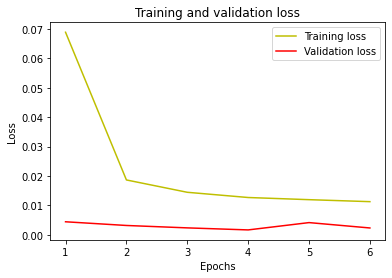

In [17]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

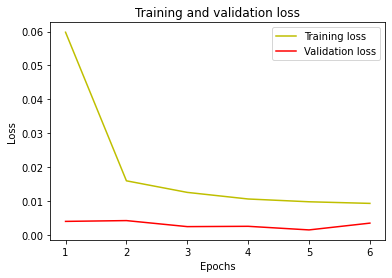

In [20]:
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

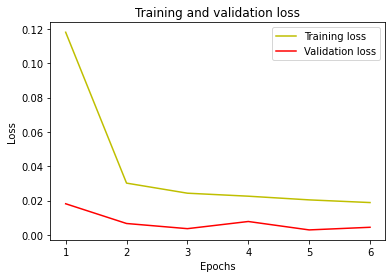

In [21]:
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

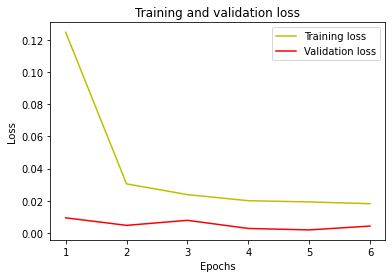

In [22]:
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [62]:
n_future=1800
forecastx1 = model.predict(testX[0:n_future])
forecasty1 = model1.predict(testX[0:n_future])
forecastx2 = model2.predict(testX[0:n_future])
forecasty2 = model3.predict(testX[0:n_future])

In [63]:
len(forecastx1)

1800

In [24]:
testvalx1 = []
testvaly1 = []
testvalx2 = []
testvaly2 = []

for i in range(200):
  testvalx1.append(testX[n_future][i][0])
  testvaly1.append(testX[n_future][i][1])
  testvalx2.append(testX[n_future][i][2])
  testvaly2.append(testX[n_future][i][3])

In [70]:
testx1

array([[0.3375887]])

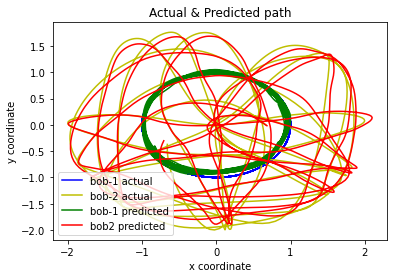

In [105]:
plt.plot(testx1, testy1, 'b', label='bob-1 actual')
plt.plot(testx2, testy2, 'y', label='bob-2 actual')
plt.plot(forecastx1, forecasty1, 'g', label='bob-1 predicted')
plt.plot(forecastx2, forecasty2, 'r', label='bob2 predicted')
plt.title('Actual & Predicted path')
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.legend()
plt.show()